<a href="https://colab.research.google.com/github/RickyBandi/SML-LAB/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preview:
   X1  X2  X3  X4   X5  Pass/Fail
0  10  90  85   1  100          1
1   5  60  70   0   80          0
2  15  95  90   1  100          1
3   2  30  50   0   40          0
4  12  85  88   1   90          1

Data Shape:
(10, 6)

Data Description:
              X1         X2         X3         X4         X5  Pass/Fail
count  10.000000  10.000000  10.000000  10.000000   10.00000  10.000000
mean    8.600000  73.000000  73.600000   0.500000   79.50000   0.500000
std     4.526465  21.390548  15.629033   0.527046   19.06859   0.527046
min     2.000000  30.000000  50.000000   0.000000   40.00000   0.000000
25%     5.250000  61.250000  61.250000   0.000000   71.25000   0.000000
50%     9.000000  80.000000  75.000000   0.500000   82.50000   0.500000
75%    11.750000  89.500000  87.250000   1.000000   93.75000   1.000000
max    15.000000  95.000000  93.000000   1.000000  100.00000   1.000000

Pass/Fail Value Counts:
Pass/Fail
1    5
0    5
Name: count, dtype: int64


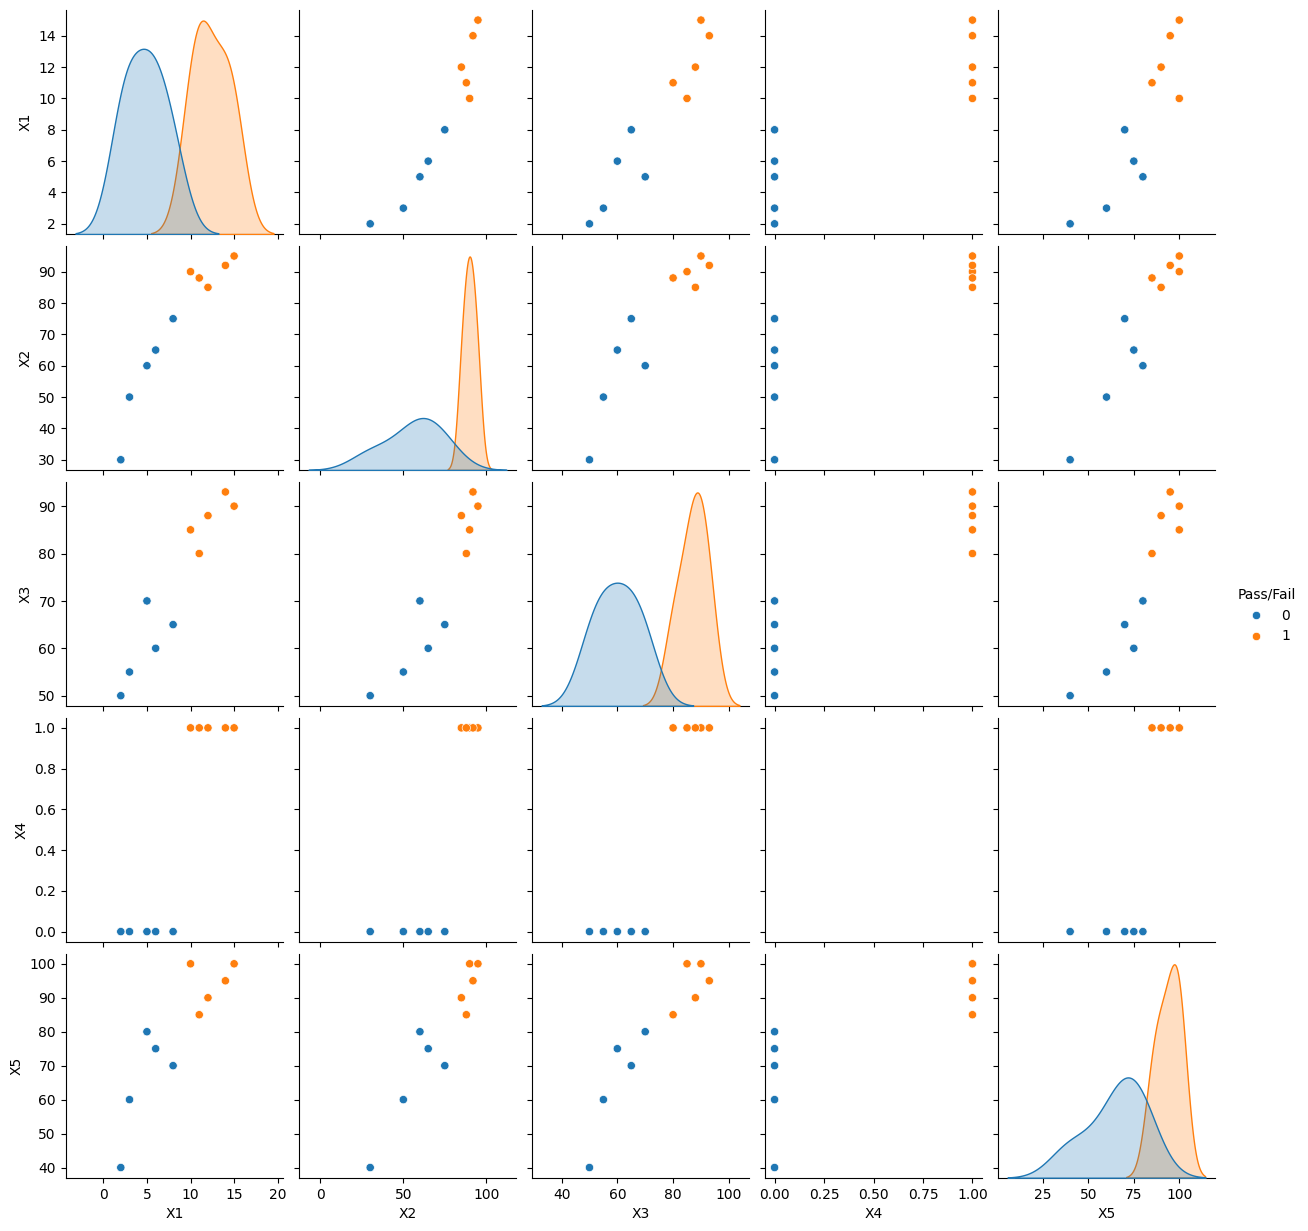


Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

file_path = ("/content/drive/MyDrive/SML Dataset/pass_fail_data.csv")
df = pd.read_csv(file_path)

print("Data Preview:")
print(df.head())

print("\nData Shape:")
print(df.shape)

print("\nData Description:")
print(df.describe())

print("\nPass/Fail Value Counts:")
print(df['Pass/Fail'].value_counts())

sns.pairplot(df, hue='Pass/Fail')
plt.show()

X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/drive/MyDrive/SML Dataset/diabetes_data_upload.csv")

df = df.dropna()

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

for column in df.columns:
    if df[column].isin(['Yes', 'No']).any():
        df[column] = label_encoder.fit_transform(df[column])

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 93.59%
